## PHASE-3-PROJECT

## Overview 

A pandemic brought on by the H1N1 influenza virus, also known as "swine flu," started in the spring of 2009. According to research, it caused anywhere from 151,000 to 575,000 deaths worldwide in the first year.

In October 2009, an H1N1 flu vaccination became widely accessible. The National 2009 H1N1 Flu Survey was carried out in the US in late 2009 and early 2010. In addition to personal information, this phone poll also questioned participants if they had gotten the H1N1 and seasonal flu vaccines. These extra questions included their social, economic, and demographic background, viewpoints on disease risks and the efficacy of vaccinations, as well as actions aimed at reducing transmission. A clearer knowledge of the connections between these traits and individual vaccination habits can

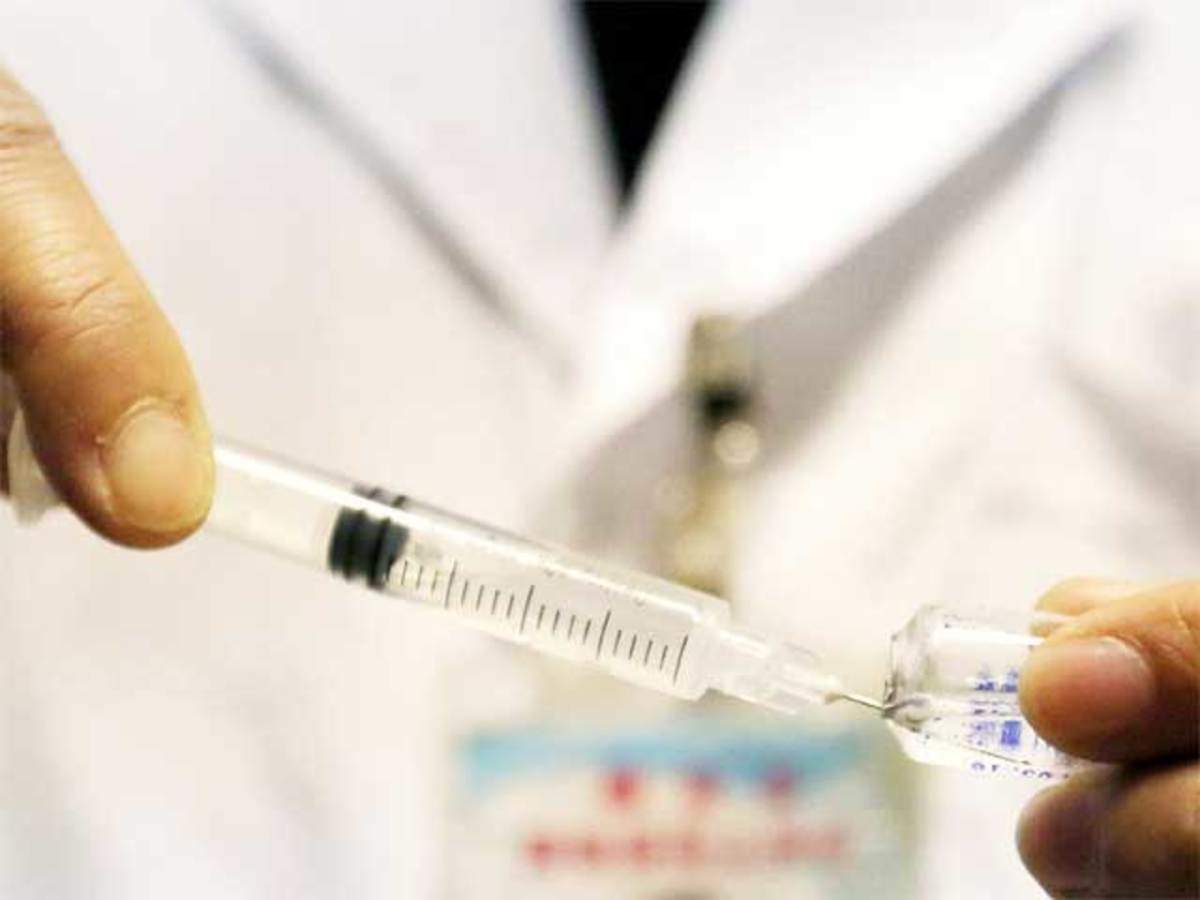

# BUSINESS UNDERSTANDING


Beginning in spring 2009, a pandemic caused by the H1N1 influenza virus, colloquially named "swine flu," swept across the world. Researchers estimate that in the first year, it was responsible for between 151,000 to 575,000 deaths globally.
A vaccine for the H1N1 flu virus became publicly available in October 2009. In late 2009 and early 2010, the United States conducted the National 2009 H1N1 Flu Survey. This phone survey asked respondents whether they had received the H1N1 and seasonal flu vaccines, in conjunction with questions about themselves. These additional questions covered their social, economic, and demographic background, opinions on risks of illness and vaccine effectiveness, and behaviors towards mitigating transmission. A better understanding of how these characteristics are associated with personal vaccination patterns can provide guidance for future public health efforts.

# DATA UNDERSTANDING

<a href="https://www.drivendata.org/competitions/66/flu-shot-learning/page/210/">Driven Data</a>
 provided the dataset that was used for this analysis. Data from the National 2009 H1N1 Flu Survey was used to compile this study (NHFS). The data consists of three files: training set labels(26707rows,3 columns), training set features (26707 rows, 36 columns), and test set features (26707 rows, 36 columns).
The National Center for Immunization and Respiratory Diseases (NCIRD) sponsored the National 2009 H1N1 Flu Survey (NHFS), which was carried out by NCIRD, the National Center for Health Statistics (NCHS), and the Centers for Disease Control and Prevention (CDC). The National Household Flu Survey (NHFS) was a list-assisted random-digit-dialing telephone survey of households conducted in 2009–2010 to track influenza vaccine coverage.

All individuals living in the United States at the time of the interview who were 6 months or older were the target group for the NHFS. Timely estimates of vaccination coverage rates for both the monovalent pH1N1 and trivalent seasonal influenza vaccines were produced using data from the NHFS.
 
 
 The information in the data is as follows:

* h1n1_concern - Level of concern about the H1N1 flu.
* h1n1_knowledge - Level of knowledge about H1N1 flu.
* behavioral_antiviral_meds - Has taken antiviral medications. (binary)
* behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)
* behavioral_face_mask - Has bought a face mask. (binary)
* behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary)
* behavioral_large_gatherings - Has reduced time at large gatherings. (binary)
* behavioral_outside_home - Has reduced contact with people outside of own household. (binary)
* behavioral_touch_face - Has avoided touching eyes, nose, or mouth. (binary)
* doctor_recc_h1n1 - H1N1 flu vaccine was recommended by doctor. (binary)
* doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor. (binary)
* chronic_med_condition - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
* child_under_6_months - Has regular close contact with a child under the age of six months. (binary)
* health_worker - Is a healthcare worker. (binary)
* health_insurance - Has health insurance. (binary)
* opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness.
* opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
* opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine.
* opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness.
* opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
* opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine.
* age_group - Age group of respondent.
* education - Self-reported education level.
* race - Race of respondent.
* sex - Sex of respondent.
* income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds.
* marital_status - Marital status of respondent.
* rent_or_own - Housing situation of respondent.
* employment_status - Employment status of respondent.
* hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
* census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
* household_adults - Number of other adults in household, top-coded to 3.
* household_children - Number of children in household, top-coded to 3.
* employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings.
* employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.

# Main Objective
The goal is to predict how likely individuals are to receive their H1N1 and seasonal flu vaccines. Specifically,predicting two probabilities: one for h1n1_vaccine and one for seasonal_vaccine.

# Metric of success
The final accuracy of the models will be used to evaluate their performance.

# DATA PREPARATION

# Loading Data

In [1]:
# loading all the necessary libraries
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns 
import json
import matplotlib.pyplot as plt
%matplotlib inline
import csv

Test set features

In [2]:
#loading the test_set_features dataset
test_set_features=pd.read_csv ('test_set_features.csv')
test_set_features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [3]:
#checking for all the information on the dataset
test_set_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_h1n1             24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

In [4]:
#checking the shape of the dataset
test_set_features.shape

(26708, 36)

Dealing with missing values 

In [5]:
#finding any null and missing values 
test_set_features.isna().sum()

respondent_id                      0
h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

There are too many missing values in the dataset, so I filled them instead of discarding them.

In [6]:
#filling the missing values with 0 & 1 as per the instructions
#filling features with 0
features = ['h1n1_concern',
            'h1n1_knowledge',
            'behavioral_antiviral_meds',
            'behavioral_avoidance',
            'behavioral_face_mask',
            'behavioral_wash_hands',
            'behavioral_large_gatherings',
            'behavioral_outside_home',
            'behavioral_touch_face',
            'doctor_recc_h1n1',
            'doctor_recc_seasonal',
            'chronic_med_condition',
            'child_under_6_months',
            'health_worker',
            'health_insurance','household_adults','household_children']
#filling labels with 1 
labels=['opinion_h1n1_vacc_effective', 'opinion_h1n1_risk','opinion_h1n1_sick_from_vacc','opinion_seas_vacc_effective', 
         'opinion_seas_risk', 'opinion_seas_sick_from_vacc']

test_set_features[features]=test_set_features[features].fillna(0)
test_set_features[labels]=test_set_features[labels].fillna(1)

In [7]:
#filling the missing strings with nill
basics = [
    'income_poverty',
    'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',  'education']


occupation = ['employment_industry',
              'employment_occupation','income_poverty']

test_set_features[basics] = test_set_features[basics].fillna('Nill')
test_set_features[occupation] = test_set_features[occupation].fillna('Nill')

In [8]:
#rechecking for missing values
test_set_features.isna().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

Checking For Duplicates

In [9]:
#checking for any duplicates in the dataset
test_set_features.duplicated().sum()

0

Training set features

In [360]:
#loading the training_set_features dataset
training_set_features=pd.read_csv ('training_set_features.csv')
training_set_features.head(5)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [11]:
#checking for the info and shape of the dataset
training_set_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [12]:
#checking for the shape of the dataset
training_set_features.shape

(26707, 36)

Dealing with duplicates and missing values

In [13]:
#checking for duplicates in the dataset
training_set_features.duplicated().sum()

0

In [14]:
#dealing with missing values
training_set_features.isna().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [15]:
#filling the missing values with 0 & 1 
#filling features with 0
features = ['h1n1_concern',
            'h1n1_knowledge',
            'behavioral_antiviral_meds',
            'behavioral_avoidance',
            'behavioral_face_mask',
            'behavioral_wash_hands',
            'behavioral_large_gatherings',
            'behavioral_outside_home',
            'behavioral_touch_face',
            'doctor_recc_h1n1',
            'doctor_recc_seasonal',
            'chronic_med_condition',
            'child_under_6_months',
            'health_worker',
            'health_insurance', 'household_adults','household_children']

#filling labels with 1
labels=['opinion_h1n1_vacc_effective', 'opinion_h1n1_risk','opinion_h1n1_sick_from_vacc','opinion_seas_vacc_effective', 
         'opinion_seas_risk', 'opinion_seas_sick_from_vacc']

training_set_features[features]=training_set_features[features].fillna(0)
training_set_features[labels]=training_set_features[labels].fillna(1)

In [16]:
#filling the missing strings with nill
basics = [
    'income_poverty',
    'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',  'education']


occupation = ['employment_industry',
              'employment_occupation','income_poverty']

training_set_features[basics] = training_set_features[basics].fillna('Nill')
training_set_features[occupation] = training_set_features[occupation].fillna('Nill')

In [17]:
training_set_features.isna().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

Training set labels

In [361]:
#loading the training_set_labels dataset
training_set_labels=pd.read_csv ('training_set_labels.csv')
training_set_labels.head(5)

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [19]:
#checking for info
training_set_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [20]:
#checking for number of rows and columns on the dataset 
training_set_labels.shape

(26707, 3)

In [21]:
#checking for duplicates
training_set_labels.duplicated().sum()

0

In [362]:
#loading the submission_format dataset
submission_format=pd.read_csv ('submission_format.csv')
submission_format.head(5)

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.5,0.7
1,26708,0.5,0.7
2,26709,0.5,0.7
3,26710,0.5,0.7
4,26711,0.5,0.7


Merging relevant datasets 



Setting index for both of the datasets that will be merged

In [23]:
#merging the training_features and training_set_labels 
#set index for the merged dataset 
training_set_features.set_index('respondent_id')
training_set_features.head()


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,Nill,Nill
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,Nill,Nill
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [363]:
training_set_labels.set_index('respondent_id')
training_set_labels.head(5)

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [25]:
#merging the datasets
features_and_labels = training_set_features.merge(training_set_labels, on = 'respondent_id', how ='inner')
features_and_labels.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,Nill,Nill,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,Nill,Nill,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [26]:
#rechecking for missing values
features_and_labels.isna().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

# Exploratory Data Analysis (EDA)

EDA is a detailed analysis designed to reveal a data set's underlying structure. It is significant because it reveals trends, patterns, and linkages that are not readily apparent.

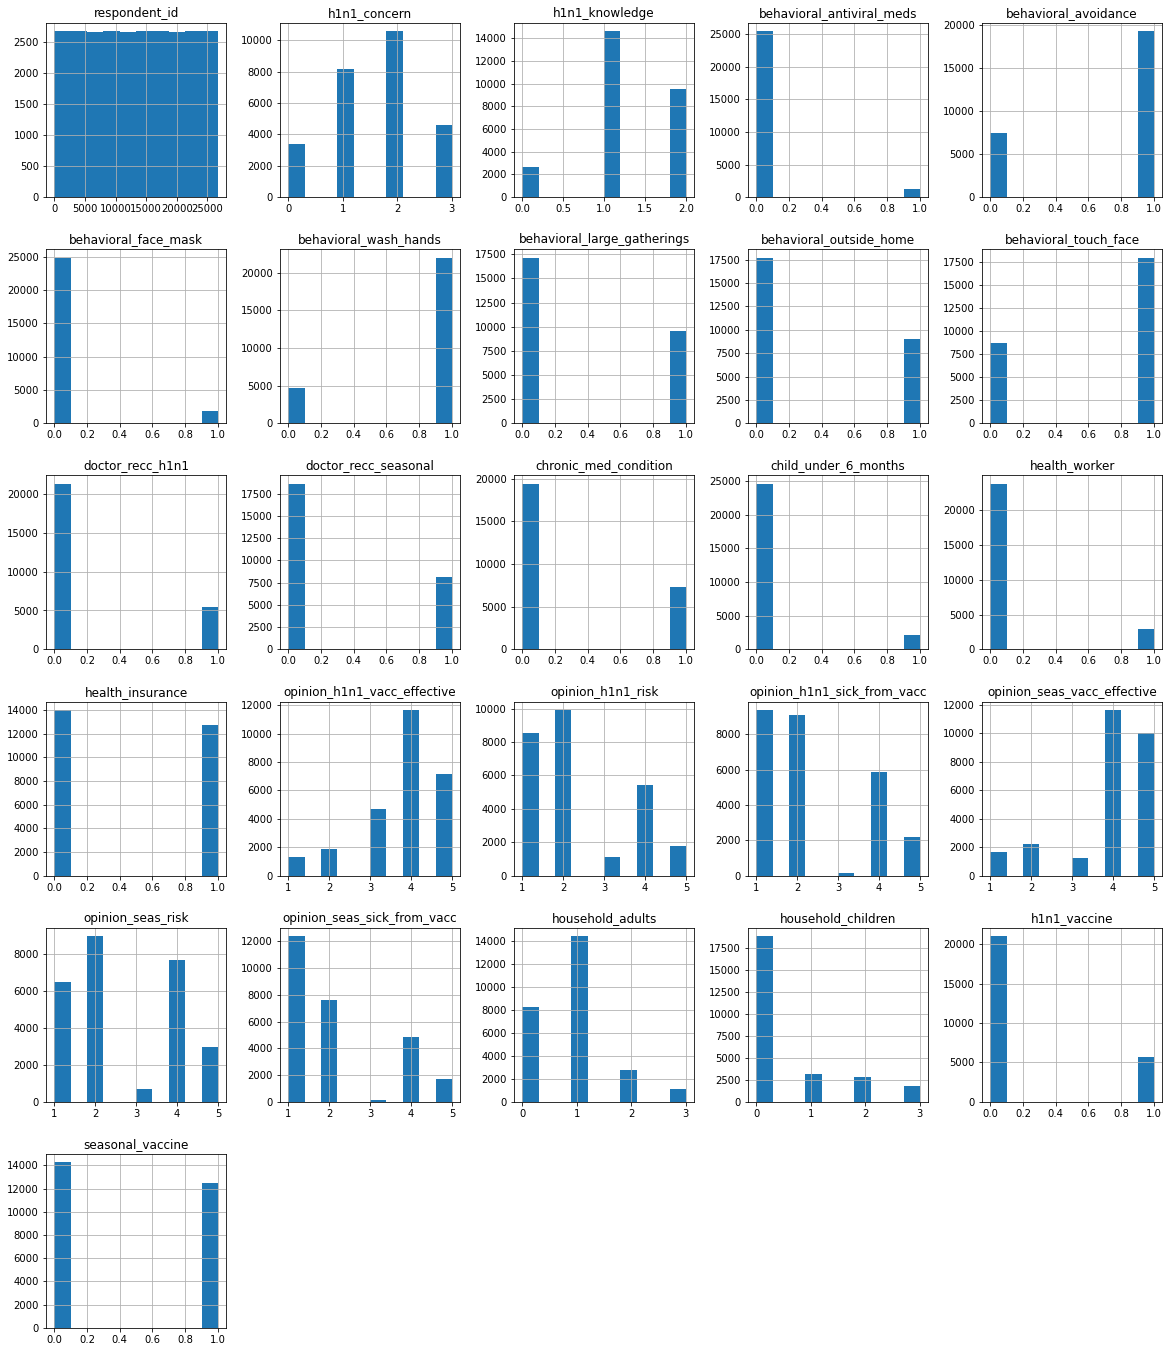

In [27]:
features_and_labels.hist(figsize=(20,24))
plt.show();

The graphs show how skewed the distribution is.

# Is there a correlation between chronic ill patients and H1N1 vaccine?

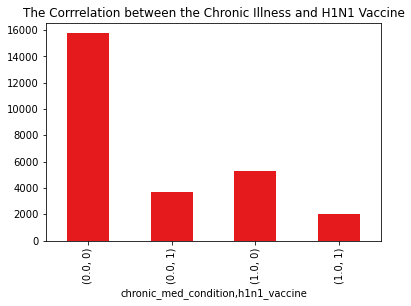

In [28]:
#Visualizing the Corrrelation between the Chronic Illness Patients and H1N1 Vaccine
chronic_vacc = features_and_labels.groupby('chronic_med_condition')
chronic_vacc['h1n1_vaccine'].value_counts().plot(kind="bar",colormap='Set1', title = 'The Corrrelation between the Chronic Illness and H1N1 Vaccine');

This graph demonstrates that less than 2,000 persons with chronic illness took the H1N1 vaccine. 

# Does the seasonal vaccine affect persons with chronic illnesses?

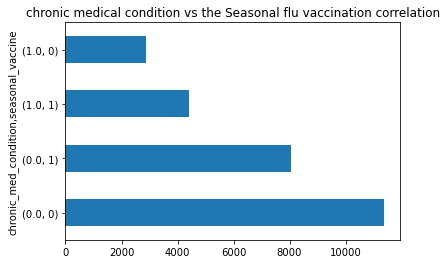

In [29]:
#visualizing the correlation btwn seasonal flu vaccine and chronic medical condition
gen_and_svacc = features_and_labels.groupby('chronic_med_condition')
gen_and_svacc['seasonal_vaccine'].value_counts().plot(kind="barh", title = 'chronic medical condition vs the Seasonal flu vaccination correlation');

More than 4000 persons with chronic medical conditions received the seasonal vaccine, according to the plot.

# Is there a connection between gender and the seasonal flu vaccine?

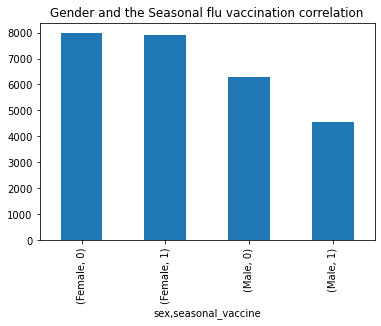

In [30]:
#visualizing the correlation btwn seasonal flu vaccine and gender
gen_and_svacc = features_and_labels.groupby('sex')
gen_and_svacc['seasonal_vaccine'].value_counts().plot(kind="bar", title = 'Gender and the Seasonal flu vaccination correlation');

The seasonal flu vaccine was taken by more females than males.

# Does the h1n1 vaccine affect gender?

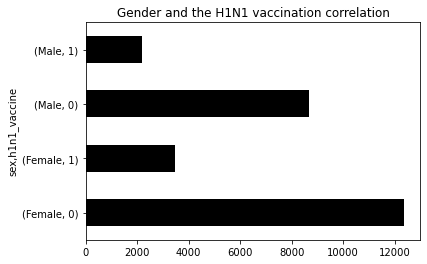

In [31]:
#Visualizing the Corrrelation between gender and h1n1 vaccine
gen_and_hvacc = features_and_labels.groupby('sex')
gen_and_hvacc['h1n1_vaccine'].value_counts().plot(kind="barh",colormap='copper', title = 'Gender and the H1N1 vaccination correlation',);

This plot shows that more females than males received the H1N1 vaccine.

# Is there a relationship between race and age?

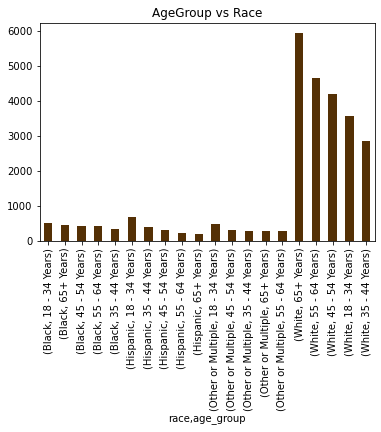

In [32]:
#visualizing  the correlation between race and agegroup
race_and_age =features_and_labels.groupby('race')
race_and_age['age_group'].value_counts().plot(kind="bar",colormap='BrBG', title = 'AgeGroup vs Race');


The plot suggests that there were more white people between the ages of 35 and 65 followed by Hispanic between the ages of 18 and 34 and other or by multiples of the same age bracket as Hispanic.

# How race is impacted by the h1n1 vaccine

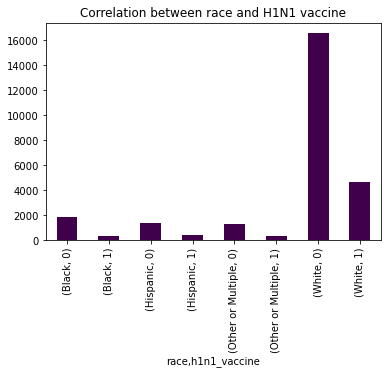

In [34]:
#Plotting a graph to find any correlation between race and the h1n1 vaccine
vacc_and_race =features_and_labels.groupby('race')
vacc_and_race['h1n1_vaccine'].value_counts().plot(kind="bar",colormap='PRGn', title = 'Correlation between race and H1N1 vaccine');

More than 4000 white people, followed by Hispanic, other or multiple persons, and the least number of Black people, received the H1N1 vaccine.

# Does race affect seasonal vaccination?

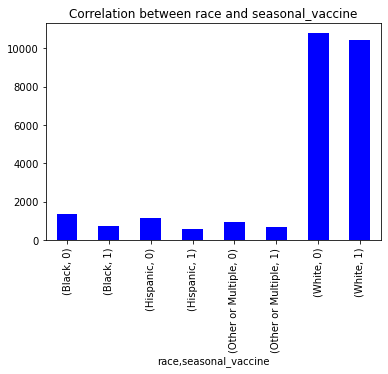

In [35]:
#Plotting a graph to find any correlation between race and the seasonal vaccine
svacc_and_race =features_and_labels.groupby('race')
svacc_and_race['seasonal_vaccine'].value_counts().plot(kind="bar",colormap='bwr', title = 'Correlation between race and seasonal_vaccine');

The seasonal vaccine was received by more than 10,000 White people, oover 1000 other or multiple people, less than 1000 Hipanic people, and fewer than 2000 Black people.

# Are the H1N1 vaccine and health insurance related?

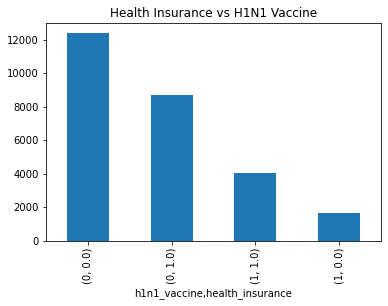

In [36]:
#Visualizing the relation that health insurance and h1n1 vaccine has
insurance_and_hvacc =features_and_labels.groupby('h1n1_vaccine')
insurance_and_hvacc['health_insurance'].value_counts().plot(kind="bar", title = 'Health Insurance vs H1N1 Vaccine');

Over 12,000 people without health insurance did not receive the H1N1 vaccine, compared to little over 4,000 people with insurance.

# What connection does a seasonal vaccine have to health insurance?

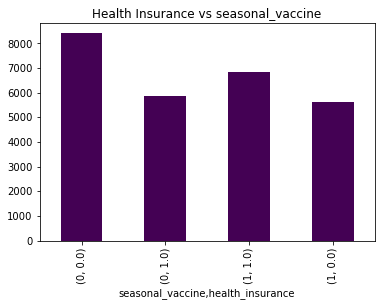

In [37]:
#Visualizing the correlation btwn health insurance and seasonal_vaccine 
insurance_and_svacc =features_and_labels.groupby('seasonal_vaccine')
insurance_and_svacc['health_insurance'].value_counts().plot(kind="bar",colormap='viridis', title = 'Health Insurance vs seasonal_vaccine');

Nearly 7000 individuals with health insurance received the seasonal flu vaccine.

# Did people receive the H1N1 vaccine because of doctors' recommendations?

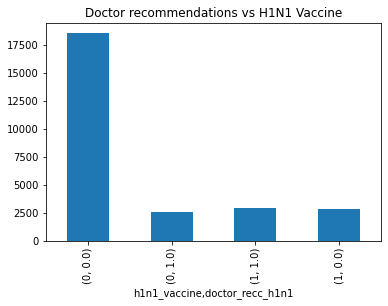

In [38]:
#visualizing doctors recommendation and h1n1 vaccine
doc_and_vacc =features_and_labels.groupby('h1n1_vaccine')
doc_and_vacc['doctor_recc_h1n1'].value_counts().plot(kind="bar", title = 'Doctor recommendations vs H1N1 Vaccine');

Over 2500 people received the H1N1 vaccine on doctors' recommendations, whereas more than 17500 declined to receive it.

# Did people receive the seasonal vaccine because of doctors' recommendations?

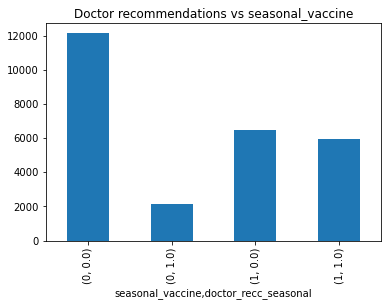

In [39]:
#visualizing doctors recommendation and seasonal_vaccine
doc_and_vacc =features_and_labels.groupby('seasonal_vaccine')
doc_and_vacc['doctor_recc_seasonal'].value_counts().plot(kind="bar", title = 'Doctor recommendations vs seasonal_vaccine');

Due to the doctor's recommendations, close to 6,000 persons received the seasonal flu vaccine.

# Is there a link between the h1n1 vaccine and seasonal flu?

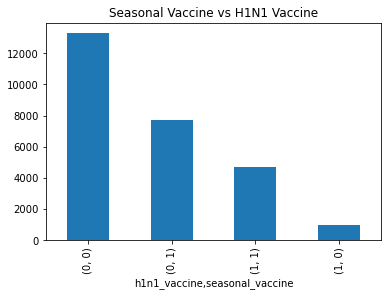

In [40]:
#visualizing the correlation btwn seasonal flu and h1n1 vaccine
seas_and_h1vacc =features_and_labels.groupby('h1n1_vaccine')
seas_and_h1vacc['seasonal_vaccine'].value_counts().plot(kind="bar", title = 'Seasonal Vaccine vs H1N1 Vaccine');

More than 4000 persons received both the H1N1 and seasonal flu vaccines. More than 12000 people skipped both.

# Were kids taken for the H1N1 vaccine?

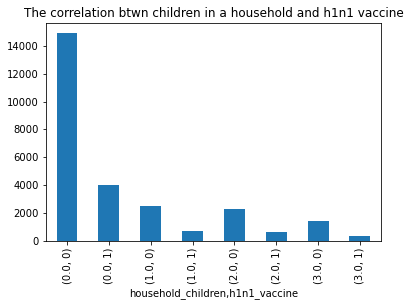

In [41]:
#visualizing the correlation btwn children in a household and h1n1 vaccine
child_and_h1vacc =features_and_labels.groupby('household_children')
child_and_h1vacc['h1n1_vaccine'].value_counts().plot(kind="bar", title = 'The correlation btwn children in a household and h1n1 vaccine');

The figure demonstrates that households with three children took the vaccine, as did those with two children, and those without children had the highest rate of no one receiving the vaccines.

# Were kids taken in for seasonal vaccine?

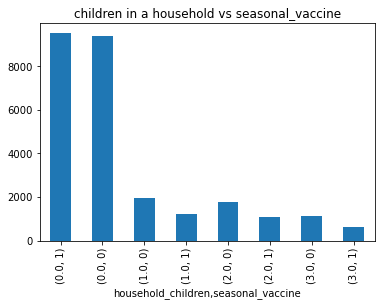

In [42]:
#visualizing the correlation btwn children in a household and seasonal_vaccine
child_and_ssvacc =features_and_labels.groupby('household_children')
child_and_ssvacc['seasonal_vaccine'].value_counts().plot(kind="bar", title = 'children in a household vs seasonal_vaccine');

The plot indicates that more than 8000 persons without children in a household received the seasonal flu vaccine, compared to less than 2000 people with a child, more than 1,000 people with two children, and less than 1,000 people with three children.

# Did access to the H1N1 vaccine depend on income?

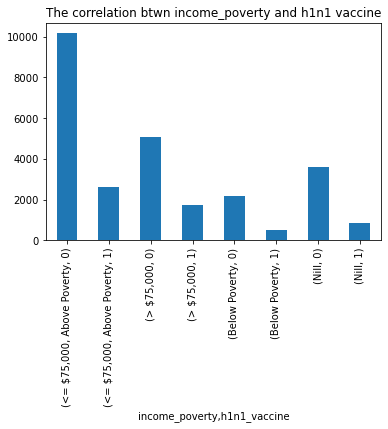

In [43]:
#visualizing the correlation btwn income_poverty and h1n1 vaccine
inc_and_h1vacc =features_and_labels.groupby('income_poverty')
inc_and_h1vacc['h1n1_vaccine'].value_counts().plot(kind="bar", title = 'The correlation btwn income_poverty and h1n1 vaccine');

Fewer than 1000 persons with incomes below the poverty line received the vaccine, but more than 4,000 people with incomes above poverty but less than or equal to $75,000 did.

# Did access to the seasonal vaccine depend on income?

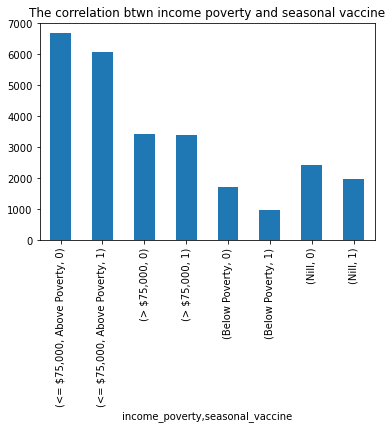

In [44]:
#visualizing the correlation btwn income_poverty and seasonal_vaccine
income_and_seas =features_and_labels.groupby('income_poverty')
income_and_seas['seasonal_vaccine'].value_counts().plot(kind="bar", title = 'The correlation btwn income poverty and seasonal vaccine');

Less than 2000 persons who were living in poverty received the seasonal vaccine, compared to more than 6000 people who were above poverty and had an income of less than or equal to $75,000.

# Correlation between the  H1N1 vaccine and marital status

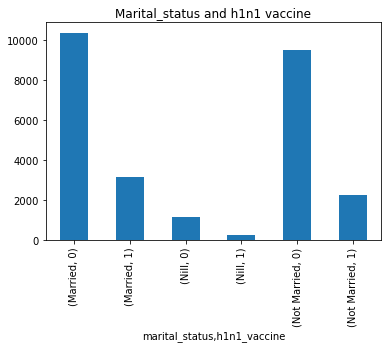

In [45]:
#visualizing the correlation btwn marital_status and h1n1 vaccine
mar_and_h1vacc =features_and_labels.groupby('marital_status')
mar_and_h1vacc['h1n1_vaccine'].value_counts().plot(kind="bar", title = 'Marital_status and h1n1 vaccine');

Around 3000 married people and over 2000 unmarried people both received the H1N1 vaccine.

# Correlation between the seasonal vaccine and  marital status

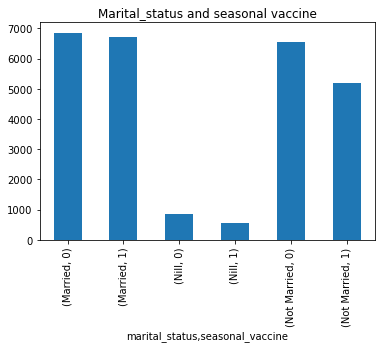

In [46]:
#visualizing the correlation btwn marital_status and seasonal_vaccine
mar_and_seas =features_and_labels.groupby('marital_status')
mar_and_seas['seasonal_vaccine'].value_counts().plot(kind="bar", title = 'Marital_status and seasonal vaccine');

Over 7000 married people and more than 5000 unmarried persons both received the seasonal flu vaccine.

# Did people's work situation affect their decision to receive the H1N1 vaccine?

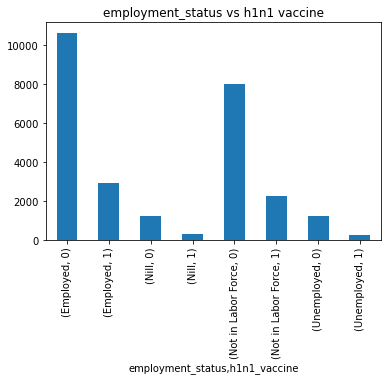

In [47]:
#visualizing the correlation btwn employemnt and h1n1 vaccine
emp_and_h1vacc =features_and_labels.groupby('employment_status')
emp_and_h1vacc['h1n1_vaccine'].value_counts().plot(kind="bar", title = 'employment_status vs h1n1 vaccine');

According to the plot, more over 3000 persons who were employed received the H1N1 vaccine, compared to less than 1000 people who were unemployed.

# Did people's work situation affect their decision to receive the season vaccine?

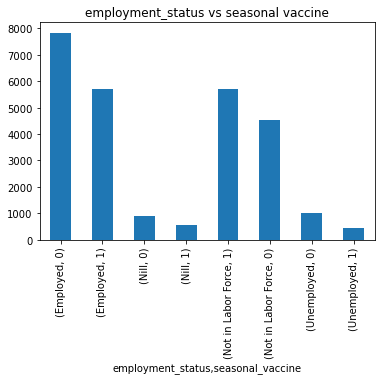

In [48]:
#visualizing the correlation btwn employment status and seasonal_vaccine
empl_and_seasvacc =features_and_labels.groupby('employment_status')
empl_and_seasvacc['seasonal_vaccine'].value_counts().plot(kind="bar", title = 'employment_status vs seasonal vaccine');

More than 5000 persons who weren't in the labor force, more than 5000 employed people, and less than 1000 unemployed people all had the vaccine

# Did health-care workers have health-care coverage?

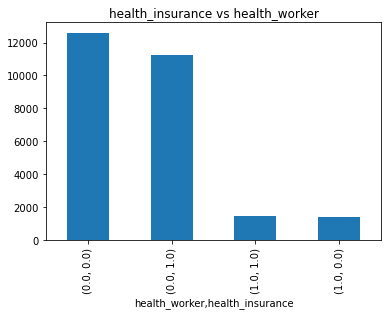

In [49]:
#visualizing the correlation btwn health workers and health insurance
empl_and_seasvacc =features_and_labels.groupby('health_worker')
empl_and_seasvacc['health_insurance'].value_counts().plot(kind="bar", title = 'health_insurance vs health_worker');

Less than 2000 healthcare professionals are shown in the plot to have health insurance.

# What level of education does the population possess?

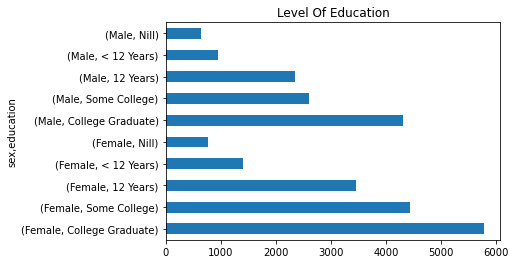

In [49]:
#visualizing the correlation btwn health workers and health insurance
empl_and_seasvacc =features_and_labels.groupby('sex')
empl_and_seasvacc['education'].value_counts().plot(kind="barh", title = 'Level Of Education');

There are more than 5,000 female college graduates compared to more than 4,000 male graduates.

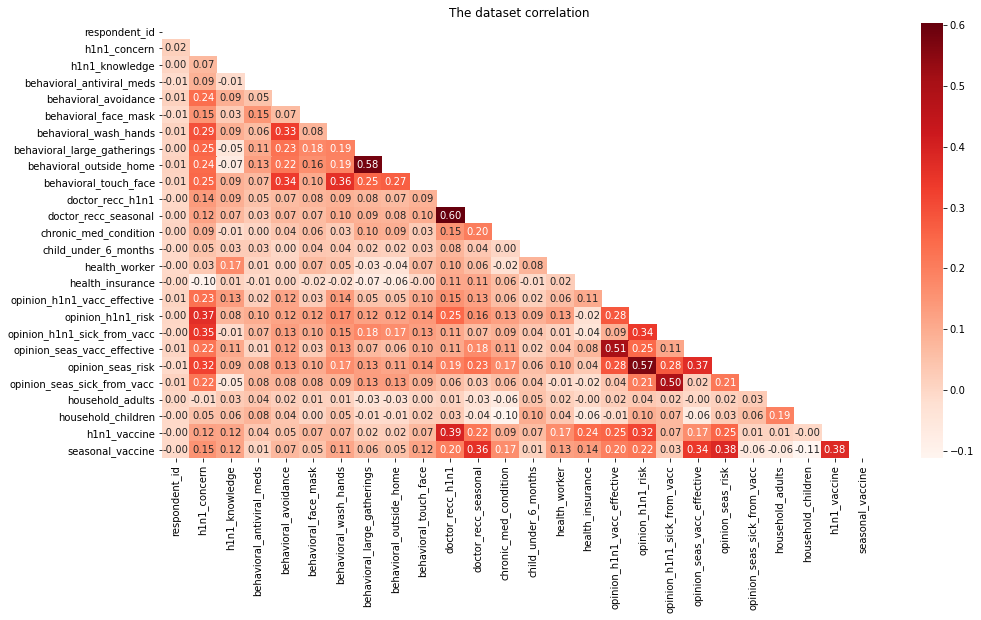

In [50]:
#correlation heatmap
plt.figure(figsize=(16,8))
mask = np.triu(np.ones_like(features_and_labels.corr(), dtype=bool))
sns.heatmap(features_and_labels.corr(),annot=True,cmap="Reds",fmt=".2f", mask=mask);
plt.title('The dataset correlation')
plt.show()

The heatmap displays the correlation in the dataset.

* Behavioural outside home and behavioural large gatherings have a correlation 0.58
* Doctors recommendation on seasonal vaccine and doctors recommendation on h1n1 vaccine have a correlation of 0.60
* Opinion seasonal vaccine effective and opinion h1n1 vaccine effective have a correlation of 0.51
* Opinion seasonal vaccine risk and opinion h1n1 vaccine risk have a correlation of 0.57
* Opinion sick from seasonal vaccine and opinion on sick from h1n1 vaccine have a correlation of 0.50


# MODELLING

In [369]:
#X Train-y Test Splitting.
#find the best model, 
#create iterative models.
#Select and assess a final model.

Splitting Data

In [293]:
#importing relevant libraries 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(training_set_features, training_set_labels, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((17893, 36), (8814, 36), (17893, 3), (8814, 3))

In [294]:
#importing relevant libraries
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import warnings

In [364]:
#calling x_train
X_train.head(5)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
11702,-0.215628,-0.676160,1.194072,-0.226751,0.627065,-0.273702,0.468367,-0.744417,-0.714381,0.700773,...,0.0,0.0,1.0,0.0,8.0,2.0,0.162841,-0.574810,5.0,7.0
967,-1.607071,1.516596,1.194072,-0.226751,-1.594731,-0.273702,0.468367,-0.744417,-0.714381,0.700773,...,2.0,2.0,2.0,2.0,1.0,0.0,0.162841,-0.574810,0.0,0.0
5547,-1.013423,1.516596,1.194072,-0.226751,0.627065,-0.273702,0.468367,-0.744417,-0.714381,0.700773,...,0.0,2.0,1.0,2.0,9.0,0.0,-1.170667,-0.574810,0.0,0.0
19590,0.806794,-0.676160,1.194072,-0.226751,0.627065,-0.273702,0.468367,-0.744417,-0.714381,0.700773,...,1.0,0.0,1.0,0.0,3.0,0.0,0.162841,1.583653,5.0,22.0
15939,0.333561,-0.676160,1.194072,-0.226751,0.627065,-0.273702,0.468367,-0.744417,-0.714381,0.700773,...,1.0,0.0,2.0,0.0,0.0,1.0,0.162841,-0.574810,5.0,1.0


In [365]:
#calling x_test
X_test.head(5)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
15772,0.317526,0.430668,-0.408996,-0.225359,0.616784,3.719998,0.447944,1.335318,1.415297,0.684657,...,3.0,1.0,0.0,1.0,0.0,1.0,-1.149875,-0.567469,0.0,0.0
9407,-0.509240,1.521444,-2.011171,-0.225359,0.616784,3.719998,0.447944,1.335318,1.415297,-1.460585,...,3.0,1.0,0.0,1.0,3.0,1.0,0.158373,0.516552,0.0,0.0
16515,0.414036,-0.660109,-0.408996,-0.225359,0.616784,-0.268817,0.447944,1.335318,1.415297,0.684657,...,3.0,2.0,1.0,0.0,0.0,0.0,-1.149875,0.516552,9.0,11.0
23353,1.302240,0.430668,1.193178,-0.225359,0.616784,-0.268817,0.447944,-0.748885,-0.706565,-1.460585,...,1.0,0.0,1.0,0.0,1.0,2.0,0.158373,1.600572,3.0,22.0
10008,-0.431174,-0.660109,1.193178,-0.225359,0.616784,-0.268817,0.447944,1.335318,-0.706565,0.684657,...,1.0,0.0,1.0,0.0,5.0,1.0,0.158373,-0.567469,19.0,22.0


In [366]:
#calling y_train
y_train.head(5)

,respondent_id,h1n1_vaccine,seasonal_vaccine
11702,11702,1,1
967,967,0,0
5547,5547,0,1
19590,19590,1,1
15939,15939,0,1


In [367]:
#calling y_test
y_test.head(5)

,respondent_id,h1n1_vaccine,seasonal_vaccine
15772,15772,0,0
9407,9407,0,1
16515,16515,0,0
23353,23353,0,0
10008,10008,0,0


In [284]:
#checking for non numerical features in the dataset
non_set = training_set_features[training_set_features.dtypes[training_set_features.dtypes == "object"].index].columns
non_set


Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation'],
      dtype='object')

In [285]:
#checking for numerical features in the dataset
num_set = training_set_features[training_set_features.dtypes[training_set_features.dtypes != "object"].index].columns
num_set

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object')

In [306]:
#scaling the numeric features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[num_set] = scaler.fit_transform(X_train[num_set])
X_train.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
11702,-0.215628,-0.676160,1.194072,-0.226751,0.627065,-0.273702,0.468367,-0.744417,-0.714381,0.700773,...,"<= $75,000, Above Poverty",Married,Own,Employed,oxchjgsf,Non-MSA,0.162841,-0.574810,fcxhlnwr,haliazsg
967,-1.607071,1.516596,1.194072,-0.226751,-1.594731,-0.273702,0.468367,-0.744417,-0.714381,0.700773,...,Below Poverty,Not Married,Rent,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",0.162841,-0.574810,Nill,Nill
5547,-1.013423,1.516596,1.194072,-0.226751,0.627065,-0.273702,0.468367,-0.744417,-0.714381,0.700773,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,"MSA, Not Principle City",-1.170667,-0.574810,Nill,Nill
19590,0.806794,-0.676160,1.194072,-0.226751,0.627065,-0.273702,0.468367,-0.744417,-0.714381,0.700773,...,"> $75,000",Married,Own,Employed,fpwskwrf,"MSA, Not Principle City",0.162841,1.583653,fcxhlnwr,xtkaffoo
15939,0.333561,-0.676160,1.194072,-0.226751,0.627065,-0.273702,0.468367,-0.744417,-0.714381,0.700773,...,"> $75,000",Married,Rent,Employed,atmpeygn,"MSA, Principle City",0.162841,-0.574810,fcxhlnwr,bxpfxfdn


In [307]:
#Encoding the non_set
from sklearn.preprocessing import OrdinalEncoder

ordinal = OrdinalEncoder()
X_train[non_set] = ordinal.fit_transform(X_train[non_set])
X_train.head()


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
11702,-0.215628,-0.676160,1.194072,-0.226751,0.627065,-0.273702,0.468367,-0.744417,-0.714381,0.700773,...,0.0,0.0,1.0,0.0,8.0,2.0,0.162841,-0.574810,5.0,7.0
967,-1.607071,1.516596,1.194072,-0.226751,-1.594731,-0.273702,0.468367,-0.744417,-0.714381,0.700773,...,2.0,2.0,2.0,2.0,1.0,0.0,0.162841,-0.574810,0.0,0.0
5547,-1.013423,1.516596,1.194072,-0.226751,0.627065,-0.273702,0.468367,-0.744417,-0.714381,0.700773,...,0.0,2.0,1.0,2.0,9.0,0.0,-1.170667,-0.574810,0.0,0.0
19590,0.806794,-0.676160,1.194072,-0.226751,0.627065,-0.273702,0.468367,-0.744417,-0.714381,0.700773,...,1.0,0.0,1.0,0.0,3.0,0.0,0.162841,1.583653,5.0,22.0
15939,0.333561,-0.676160,1.194072,-0.226751,0.627065,-0.273702,0.468367,-0.744417,-0.714381,0.700773,...,1.0,0.0,2.0,0.0,0.0,1.0,0.162841,-0.574810,5.0,1.0


In [296]:
#Encoding num_set
from sklearn.preprocessing import OrdinalEncoder

#scaling non set
X_test[num_set]= scaler.fit_transform(X_test[num_set])
X_test.head(5)

ordinal = OrdinalEncoder()
X_test[non_set] = ordinal.fit_transform(X_test[non_set])

X_test.head(5)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
15772,0.317526,0.430668,-0.408996,-0.225359,0.616784,3.719998,0.447944,1.335318,1.415297,0.684657,...,3.0,1.0,0.0,1.0,0.0,1.0,-1.149875,-0.567469,0.0,0.0
9407,-0.509240,1.521444,-2.011171,-0.225359,0.616784,3.719998,0.447944,1.335318,1.415297,-1.460585,...,3.0,1.0,0.0,1.0,3.0,1.0,0.158373,0.516552,0.0,0.0
16515,0.414036,-0.660109,-0.408996,-0.225359,0.616784,-0.268817,0.447944,1.335318,1.415297,0.684657,...,3.0,2.0,1.0,0.0,0.0,0.0,-1.149875,0.516552,9.0,11.0
23353,1.302240,0.430668,1.193178,-0.225359,0.616784,-0.268817,0.447944,-0.748885,-0.706565,-1.460585,...,1.0,0.0,1.0,0.0,1.0,2.0,0.158373,1.600572,3.0,22.0
10008,-0.431174,-0.660109,1.193178,-0.225359,0.616784,-0.268817,0.447944,1.335318,-0.706565,0.684657,...,1.0,0.0,1.0,0.0,5.0,1.0,0.158373,-0.567469,19.0,22.0


# Logistic Regression

In [297]:
#importing relavant libraries
from sklearn.linear_model import LogisticRegression

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

#instantiation
model_1 = LogisticRegression(random_state=42)


In [298]:
#dropping respondent id column for h1n1
y_train_vacc1 = y_train.drop(columns=['respondent_id', 'seasonal_vaccine'])
y_test_vacc1 = y_test.drop(columns=['respondent_id', 'seasonal_vaccine'])

In [308]:
#importing relevant libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

model_1 = LogisticRegression()

# Fitting the model
model_1.fit(X_train, y_train_vacc1)

# Predicting the target variable 
y_predic = model_1.predict(X_test)

accuracy_model1 = accuracy_score(y_predic, y_test_vacc1)
print('Accuracy:', accuracy_model1)
precision_model1 = precision_score(y_test_vacc1, y_predic)
print('Precision:', precision_model1)
recall_model1 = recall_score(y_test_vacc1, y_predic)
print('Recall:', recall_model1)
f1 = f1_score(y_test_vacc1, y_predic)
print('F1 score:', f1)

#cross-validation
model_1_neg_log_loss_crossval = cross_val_score(model_1, X_train, y_train_vacc1, scoring='neg_log_loss', error_score='raise')

model_1_neg = -(model_1_neg_log_loss_crossval.mean())
print('Cross Validation:', model_1_neg)




Accuracy: 0.8479691400045383
Precision: 0.7160392798690671
Recall: 0.4684154175588865
F1 score: 0.5663430420711973
Cross Validation: 0.3649470270985512


In [368]:
##dropping respondent id column for seasonal
y_train_vacc2 = y_train.drop(columns=['respondent_id', 'h1n1_vaccine'])
y_test_vacc2 = y_test.drop(columns=['respondent_id', 'h1n1_vaccine'])

In [334]:
# Create a Logistic Regression object
model_1 = LogisticRegression()

# Fit the model to the training data
model_1.fit(X_train, y_train_vacc2)

# Predict the target variable for the test data
y_predic2 = model_1.predict(X_test)

accuracy2_model1 = accuracy_score(y_predic2, y_test_vacc2)
print('Accuracy:', accuracy_model1)
precision2_model1 = precision_score(y_test_vacc2, y_predic2)
print('Precision:', precision2_model1)
recall2_model1 = recall_score(y_test_vacc2, y_predic2)
print('Recall:', recall2_model1)
f1 = f1_score(y_test_vacc2, y_predic2)
print('F1 score:', f1)
#evaluating the model using cross validation
model_1_neg_log_loss_val = cross_val_score(model_1, X_train,y_train_vacc2, scoring='neg_log_loss', error_score='raise')
model_1_valscore = -(model_1_neg_log_loss_val.mean())
print('Cross validation:', model_1_valscore)

final_acc1 = (accuracy_model1 + accuracy2_model1)/2
print('Final Accuracy:', final_acc1)

Accuracy: 0.8479691400045383
Precision: 0.7688934743358267
Recall: 0.7371414441147379
F1 score: 0.7526827420780204
Cross validation: 0.4896384147496626
Final Accuracy: 0.8128545495802133


In [311]:
#Finding RMSE of 'y_true' and 'y_predict'
#importing relevant libraries 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
r2 = r2_score(y_test_vacc1, y_predic)

mse_e = np.sqrt(mean_squared_error(y_test_vacc1, y_predic))

print(r2, mse_e)


0.08973845961288407 0.3899113488928756


In [312]:
#Finding RMSE of 'y_true' and 'y_predict'
r_2 = r2_score(y_test_vacc2, y_predic2)

mse_2 = np.sqrt(mean_squared_error(y_test_vacc2, y_predic2))

print(r_2,mse_2)

-0.5178999558317621 0.6139221332953743


# Decision Tree

In [335]:
from sklearn.tree import DecisionTreeClassifier

model_2 = DecisionTreeClassifier()

model_2.fit(X_train, y_train_vacc1)


DecisionTreeClassifier()

In [336]:
#dropping respondent id column for h1n1
y_train_vacc1 = y_train.drop(columns=['respondent_id', 'seasonal_vaccine'])
y_test_vacc1 = y_test.drop(columns=['respondent_id', 'seasonal_vaccine'])

In [343]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target


# Create a decision tree model
model_2= DecisionTreeClassifier()

model_2_neg_crossval = cross_val_score(model_2, X_train, y_train_vacc1, scoring='neg_log_loss', error_score='raise')

model_2_neg = -(model_2_neg_crossval.mean())
print('Cross Validation:', accuracy)

# Train the model using the training data
model_2.fit(X_train, y_train_vacc1)

y_predic = model_2.predict(X_test)

# Evaluate the model using the testing data
accu = model_2.score(X_test, y_test_vacc1)
print('Accuracy:', accu)


preci = precision_score(y_test_vacc1, y_predic)
print("Precision:", preci)

reca = recall_score(y_test_vacc1, y_predic)
print("Recall:", reca)

f1 = f1_score(y_test_vacc1, y_predic)
print('F1 score:', f1)


Cross Validation: 0.7707056954844566
Accuracy: 0.7780803267528931
Precision: 0.4778449144008056
Recall: 0.5080299785867237
F1 score: 0.4924753502854177


In [344]:
#Finding RMSE of 'y_true' and 'y_predict'
#importing relevant libraries 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
r2 = r2_score(y_test_vacc1, y_predic)

mse_e = np.sqrt(mean_squared_error(y_test_vacc1, y_predic))

print(r2, mse_e)


-0.32871012910238706 0.47108350984417496


In [345]:
#Finding RMSE of y_test and y_predic
r_2 = r2_score(y_test_vacc2, y_predic2)

mse_2 = np.sqrt(mean_squared_error(y_test_vacc2, y_predic2))

print(r_2,mse_2)

-0.2848689571941345 0.5648343954285479


In [346]:
#dropping respondent id column for seasonal
y_train_vacc2 = y_train.drop(columns=['respondent_id', 'h1n1_vaccine'])
y_test_vacc2 = y_test.drop(columns=['respondent_id', 'h1n1_vaccine'])

In [347]:
# Create a decision tree model
model_2 = DecisionTreeClassifier()

model_2_neg_log_loss_crossval = cross_val_score(model_2, X_train, y_train_vacc2, scoring='neg_log_loss', error_score='raise')

model_2_neg = -(model_2_neg_log_loss_crossval.mean())
print('Cross Validation:', accuracy)


# Train the model using the training data
model_2.fit(X_train, y_train_vacc2)

y_predic2 = model_2.predict(X_test)

accu_2 = accuracy_score(y_predic2, y_test_vacc2)
print('Accuracy:', accu_2)
precisionmodel_2 = precision_score(y_test_vacc2, y_predic2)
print('Precision:', precisionmodel_2)
recallmodel_2 = recall_score(y_test_vacc2, y_predic2)
print('Recall:', recallmodel_2)

f1 = f1_score(y_test_vacc2, y_predic2)
print('F1 score:', f1)


final_acc2 = (accu + accu_2)/2
print('Final Accuracy:', final_acc2)

Cross Validation: 0.7707056954844566
Accuracy: 0.6794871794871795
Precision: 0.6490584494986549
Recall: 0.6562809099901088
F1 score: 0.6526496987581458
Final Accuracy: 0.7287837531200363


Using Entropy to determing the quality of the split

In [349]:
#Entropy = -∑(pi * log2(pi))
#Instatiating the model with criterion='entropy' and max_depth=3
model_2  = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
model_2 = model_2.fit(X_train, y_train_vacc1)

#Predict the response for test dataset
y_predic = model_2.predict(X_test)

# Model Accuracy, how often is the classifier correct?
entropy_ = accuracy_score(y_test_vacc1, y_predic)
print ("H1N1 entropy:",entropy_)

entropy_2 = accuracy_score(y_test_vacc2, y_predic2)
print ("Seasonal entropy:",entropy_2)

final_accuracy = (entropy_ + entropy_2)/2
print("Final accuracy:", final_accuracy)


H1N1 entropy: 0.8240299523485364
Seasonal entropy: 0.6794871794871795
Final accuracy: 0.751758565917858


# XGBoost

In [350]:
#importing relevant libraries
import xgboost as xgb


In [351]:
# Convert features and targets into DMatrix objects
dtrain = xgb.DMatrix(X_train, y_train_vacc1)
dtest = xgb.DMatrix(y_test_vacc2, y_predic)

# Set XGBoost parameters
params = {
    "booster": "gbtree",
    "objective": "binary:logistic",
    "eval_metric": "error",
    "max_depth": 4,
    "subsample": 0.5,
    "colsample_bytree": 0.5,
    "eta": 0.1,
    "seed": 42,
    
}
# Train the XGBoost model
model_3 = xgb.train(params, dtrain, num_boost_round=100)



In [352]:
#dropping respondent id column for h1n1
y_train_vacc1 = y_train.drop(columns=['respondent_id', 'seasonal_vaccine'])
y_test_vacc1 = y_test.drop(columns=['respondent_id', 'seasonal_vaccine'])

In [353]:
# Evaluate model's performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the model using the testing data
model_3= DecisionTreeClassifier()

model_3_neg_crossval = cross_val_score(model_3, X_train, y_train_vacc1, scoring='neg_log_loss', error_score='raise')

model_3_neg = -(model_3_neg_crossval.mean())
print('Cross Validation:', accuracy)

accuracy_3= accuracy_score(y_test_vacc1, y_predic)
precision_3 = precision_score(y_test_vacc1, y_predic)
recall_3 = recall_score(y_test_vacc1, y_predic)
f1 = f1_score(y_test_vacc1, y_predic)

print("Accuracy: ", accuracy_3)
print("Precision: ", precision_3)
print("Recall: ", recall_3)
print("F1-score: ", f1)

Cross Validation: 0.7707056954844566
Accuracy:  0.8240299523485364
Precision:  0.8163672654690619
Recall:  0.21895074946466808
F1-score:  0.34529337273111016


In [354]:
#dropping respondent id column for seasonal vaccine
y_train_vacc2 = y_train.drop(columns=['respondent_id', 'h1n1_vaccine'])
y_test_vacc2 = y_test.drop(columns=['respondent_id', 'h1n1_vaccine'])

In [355]:
# Evaluate the model using the testing data

model_3_neg_log_loss_crossval = cross_val_score(model_3, X_train, y_train_vacc2, scoring='neg_log_loss', error_score='raise')

model_3_neg = -(model_3_neg_log_loss_crossval.mean())
print('Cross Validation:', accuracy)

accuracymod3 = accuracy_score(y_predic2, y_test_vacc2)
precisionmod3 = precision_score(y_test_vacc2, y_predic2)
recallmod3 = recall_score(y_test_vacc2, y_predic2)
f1 = f1_score(y_test_vacc2, y_predic2)

final_acc3= (accuracy_3 + accuracymod3)/2

print("Accuracy: ", accuracymod3)
print("Precision: ", precisionmod3)
print("Recall: ", recallmod3)
print("F1-score: ", f1)
print('Final Accuracy:', final_acc3)

Cross Validation: 0.7707056954844566
Accuracy:  0.6794871794871795
Precision:  0.6490584494986549
Recall:  0.6562809099901088
F1-score:  0.6526496987581458
Final Accuracy: 0.751758565917858


In [356]:
#finding rmse
r2 = r2_score(y_test_vacc1, y_predic)

mse_e = np.sqrt(mean_squared_error(y_test_vacc1, y_predic))

print(r2, mse_e)

-0.05359376801523652 0.4194878396943868


In [357]:
r_2 = r2_score(y_test_vacc2, y_predic2)

mse_2 = np.sqrt(mean_squared_error(y_test_vacc2, y_predic2))

print(r_2,mse_2)

-0.2908089630417605 0.5661385170722979


# EVALUATION

Models Output 


In [358]:
#visualizing the results
data = {'Model':["Logistic Regression", "Decision Tree", "XGBoost"],
        'Accuracy H1N1': [accuracy_model1 * 100, entropy_ * 100, accuracy_3 * 100],
        'Accuracy Seasonal':[accuracy2_model1 * 100, entropy_2 * 100, accuracymod3 * 100],
        'Final Accuracy':[final_acc1 * 100, final_accuracy * 100, final_acc3 * 100],
        'Precision H1N1':[precision_model1 * 100, precisionmodel_2 * 100, precision_3 * 100],
        'Precision Seasonal':[precision2_model1 * 100,precision2 * 100,precisionmod3 * 100],
        'Recall H1N1':[recall_model1 * 100, recall_model2 * 100, recall_3 * 100],
        'Recall seasonal':[recall2_model1 * 100, recallmodel_2 * 100, recallmod3 * 100]
       }

output = pd.DataFrame(data)
output = output.round(2)
 
output


,Model,Accuracy H1N1,Accuracy Seasonal,Final Accuracy,Precision H1N1,Precision Seasonal,Recall H1N1,Recall seasonal
0,Logistic Regression,84.8,77.77,81.29,71.60,76.89,46.84,73.71
1,Decision Tree,82.4,67.95,75.18,64.91,77.71,65.63,65.63
2,XGBoost,82.4,67.95,75.18,81.64,64.91,21.90,65.63


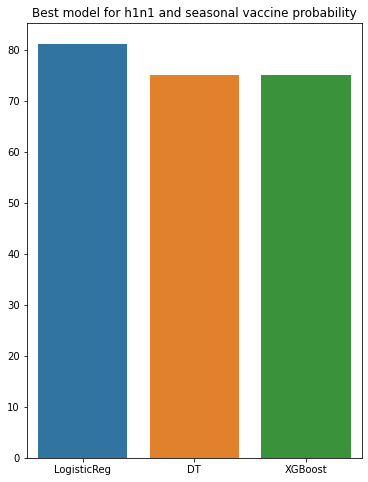

In [400]:
# visualizing the test accuracy results
model_names = ["LogisticReg","DT", 'XGBoost']
plt.figure(figsize = (6,8))
sns.barplot(x = model_names, y = data['Final Accuracy'])
plt.title("Best model for h1n1 and seasonal vaccine probability")
plt.show()

The logistic regression model, which returned 81.29% more results than the other two models, is now the best of the ones that were utilized.

In [370]:
#Loading our datasets
training_set = pd.read_csv('training_set_features.csv')
set_labels = pd.read_csv('training_set_labels.csv')
test_set = pd.read_csv('test_set_features.csv')

In [379]:
model_1.fit(X_train, y_train_vacc1)
y_predic = model_1.predict(X_test)

final_h1n1 = accuracy_score(y_test_vacc1, y_predic)
print("Final H1N1 predicitions:", final_h1n1)

Final H1N1 predicitions: 0.8479691400045383


In [380]:
model_1.fit(X_train, y_train_vacc2)

# Predict the target variable for the test data
y_predic2 = model_1.predict(X_test)

final_seasonal = accuracy_score(y_test_vacc2, y_predic2)

print("Final Seasonal predictions:", final_seasonal)

Final Seasonal predictions: 0.7777399591558883


In [385]:
#h1n1 predictions
h1n1 = pd.DataFrame(
    {
        "h1n1_vaccine": final_h1n1,
    },
    index = test1.respondent_id
)
print("h1n1.shape:", final_h1n1.shape)

h1n1.head()

h1n1.shape: ()


,h1n1_vaccine
respondent_id,
26707,0.847969
26708,0.847969
26709,0.847969
26710,0.847969
26711,0.847969


In [386]:
#seasonal predictions
seasonal = pd.DataFrame(
    {
        "seasonal_vaccine": final_seasonal,
    },
    index = test1.respondent_id
)
print("h1n1.shape:", final_seasonal)

seasonal.head()

h1n1.shape: 0.7777399591558883


,seasonal_vaccine
respondent_id,
26707,0.77774
26708,0.77774
26709,0.77774
26710,0.77774
26711,0.77774


In [390]:
#joining h1n1 and seasonal
submission = h1n1.join(seasonal, on='respondent_id')

submission['h1n1_vaccine'] = submission['h1n1_vaccine']
submission['seasonal_vaccine'] = submission['seasonal_vaccine']

submission

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.847969,0.77774
26708,0.847969,0.77774
26709,0.847969,0.77774
26710,0.847969,0.77774
26711,0.847969,0.77774
...,...,...
53410,0.847969,0.77774
53411,0.847969,0.77774
53412,0.847969,0.77774


In [401]:
#convert submission to csv
submission.to_csv('submission_format.csv')
submission

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.847969,0.77774
26708,0.847969,0.77774
26709,0.847969,0.77774
26710,0.847969,0.77774
26711,0.847969,0.77774
...,...,...
53410,0.847969,0.77774
53411,0.847969,0.77774
53412,0.847969,0.77774


# Conclusion
* People who received the seasonal vaccine outperformed those who received the H1N1 vaccine.
* Women received both immunizations at a higher rate than males.
* White folks received both immunizations at a higher rate than other races.
* People with health insurance chose seasonal vaccines over H1N1 vaccines.
* More People chose the seasonal vaccine over the H1N1 vaccine based on doctor’s recommendations.
* There were fewer persons seeking both immunizations than predicted.
* In addition, children were not as well immunized as planned.

# Recommendations
Based on the conclusion drawn from the data, here are a few recommendations that could be made:

* Promote the importance of the seasonal flu vaccine over the H1N1 vaccine, highlighting its higher efficacy and safety record.
* Encourage greater immunization rates among males and people of other races, perhaps through targeted outreach and education initiatives.
* Address the issue of access to health insurance, as it appears to impact vaccine choice.
* Encourage more people to seek recommendations from their healthcare providers, as this seems to be a significant factor in vaccine choice.
* Address the low immunization rate among children by increasing awareness of the importance of protecting this vulnerable population and providing easier access to vaccines for families with young children.
* Consider additional strategies to increase overall immunization rates, such as offering incentives or increasing accessibility to vaccines.
* Further analysis and research may be needed to understand and address the underlying issues more effectively.